<a href="https://colab.research.google.com/github/ta3map/StudentNeuralNetwork/blob/main/StudentsNeuralNetwork_with_NeuroLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict next grades from previous

Example data

In [1]:
!git clone https://github.com/ta3map/StudentNeuralNetwork

Cloning into 'StudentNeuralNetwork'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 15), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/StudentNeuralNetwork/example_dataset_v2.xlsx')

# make all columns as str
df.columns = df.columns.astype(str)

df

,№ Студента,"2018,Физика","2018,Химия","2018,Высшая математика","2018,Иностранный язык","2018,Информационные и компьютерные технологии","2018,Инженерное геометрическое моделирование","2018,Технологии самообразования и самоорганизации","2018,Русский язык и культура речи","2018,История","2018,Правоведение","2019,Безопасность жизнедеятельности","2019,Экология","2019,Материаловедение","2019,Теоретическая механика","2019,Специальные разделы математики","2019,Теоретические основы теплотехники 1","2019,Теоретические основы электротехники 1","2019,Теоретические основы электротехники 2","2019,Методы моделирования и исследования","2019,Философия","2019,Электрические цепи и электротехнические устройства","2019,Тепловая и ядерная энергетика","2019,Электробезопасность и охрана труда","2019,Менеджмент","2019,Энергетические машины, аппараты и установки","2019,Метрология, стандартизация и сертификация","2019,Экономика","2020,Безопасность жизнедеятельности","2020,Высшая математика","2020,Инженерное геометрическое моделирование","2020,Иностранный язык","2020,Информационные и компьютерные технологии","2020,История","2020,Материаловедение","2020,Менеджмент","2020,Методы моделирования и исследования","2020,Метрология, стандартизация и сертификация","2020,Правоведение","2020,Русский язык и культура речи","2020,Специальные разделы математики","2020,Теоретическая механика","2020,Теоретические основы теплотехники 1","2020,Теоретические основы электротехники 1","2020,Теоретические основы электротехники 2","2020,Тепловая и ядерная энергетика","2020,Технологии самообразования и самоорганизации","2020,Физика","2020,Философия","2020,Химия","2020,Экология","2020,Экономика","2020,Электрические цепи и электротехнические устройства","2020,Электробезопасность и охрана труда","2020,Энергетические машины, аппараты и установки","2020,Электрические машины","2020,Электроэнергетические системы и сети","2020,Электромонтажное дело","2020,Основы релейной защиты","2020,Нормативно-техническая и эксплуатационная документация по релейной защите","2020,История (История России, Всеобщая история)","2020,Теоретические основы электротехники","2020,Прикладная механика","2020,Промышленная электроника","2020,Физическая культура и спорт","2020,Элементы автоматических устройств","2020,Техника высоких напряжений","2020,Электроснабжение","2020,Электромонтажные работы в действующих электроустановках до 1000 В","2021,Автоматизация электроэнергетических систем","2021,Переходные электромеханические процессы","2021,Основы проектирования релейной защиты и автоматики","2021,Расчет токов короткого замыкания","2021,Релейная защита электроэнергетических систем","2021,Релейная зашита объектов электроэнергетических систем","2021,Микропроцессорные системы управления в электроэнергетике","2021,Технические средства диспетчерского и технологического управления"
0,118823,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,118917,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,118921,4,5,4,5,4,5,5,4,5,5,5,5,4,4,5,4,5,5,4,5,5,5,5,5,4,4,5,5,4,5,5,4,5,4,5,4,4,5,4,5,4,4,5,5,5,5,4,5,5,5,5,5,5,4,4,5,5,3,5,5,5,5,5,5,5,5,5,5,4,5,4,5,5,5,5,5
3,118964,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,118966,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,118967,5,5,4,5,4,5,4,4,5,4,4,5,4,5,4,5,4,4,4,5,3,4,5,5,4,4,5,4,4,5,5,4,5,4,5,4,4,4,4,4,5,5,4,4,4,4,5,5,5,5,5,3,5,4,3,4,4,3,5,5,4,4,5,5,5,5,4,4,4,3,3,4,3,3,5,5
6,118969,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,118990,5,4,4,5,4,5,5,5,4,5,5,5,4,

Choose the year

In [3]:
year = 2018
# Find column whose name contains a specific string - year
spike_cols = [col for col in df.columns if str(year) in col]
print(list(df.columns))
print(spike_cols)

['№ Студента', '2018,Физика', '2018,Химия', '2018,Высшая математика', '2018,Иностранный язык', '2018,Информационные и компьютерные технологии', '2018,Инженерное геометрическое моделирование', '2018,Технологии самообразования и самоорганизации', '2018,Русский язык и культура речи', '2018,История', '2018,Правоведение', '2019,Безопасность жизнедеятельности', '2019,Экология', '2019,Материаловедение', '2019,Теоретическая механика', '2019,Специальные разделы математики', '2019,Теоретические основы теплотехники 1', '2019,Теоретические основы электротехники 1', '2019,Теоретические основы электротехники 2', '2019,Методы моделирования и исследования', '2019,Философия', '2019,Электрические цепи и электротехнические устройства', '2019,Тепловая и ядерная энергетика', '2019,Электробезопасность и охрана труда', '2019,Менеджмент', '2019,Энергетические машины, аппараты и установки', '2019,Метрология, стандартизация и сертификация', '2019,Экономика', '2020,Безопасность жизнедеятельности', '2020,Высшая м

In [4]:
# extract grades from this year
df[spike_cols].to_numpy()[:].astype(int)

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [4, 5, 4, 5, 4, 5, 5, 4, 5, 5],
       [5, 5, 4, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 4, 5, 4, 4, 5, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 4, 4, 5, 4, 5, 5, 5, 4, 5],
       [5, 5, 4, 5, 5, 5, 5, 4, 4, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 5, 4, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [4, 4, 3, 5, 5, 5, 5, 5, 4, 5],
       [5, 4, 5, 5, 5, 5, 5, 4, 5, 4],
       [5, 5, 5, 5, 4, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 4, 5, 5, 5, 5, 5],
       [5, 5, 3, 5, 4, 5, 5, 5, 5, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 3, 5, 4, 5, 5, 4, 5, 5],
       [5, 5, 5, 5, 4, 4, 5, 5, 5, 5],
       [5, 4, 4, 5, 5, 5, 5, 5, 5, 5],
       [4, 5, 3, 3, 3, 4, 3, 4, 4, 4],
       [5, 5, 4, 5, 5, 5, 5, 5, 5, 5]])

In [5]:
df[spike_cols].columns

Index(['2018,Физика', '2018,Химия', '2018,Высшая математика',
       '2018,Иностранный язык',
       '2018,Информационные и компьютерные технологии',
       '2018,Инженерное геометрическое моделирование',
       '2018,Технологии самообразования и самоорганизации',
       '2018,Русский язык и культура речи', '2018,История',
       '2018,Правоведение'],
      dtype='object')

a function for getting data from the year

In [6]:
# function for getting data from the year
def getYear(df, year):
  spike_cols = [col for col in df.columns if str(year) in col]
  data_out = df[spike_cols].to_numpy()[:].astype(int)
  columns = df[spike_cols].columns
  return data_out, columns

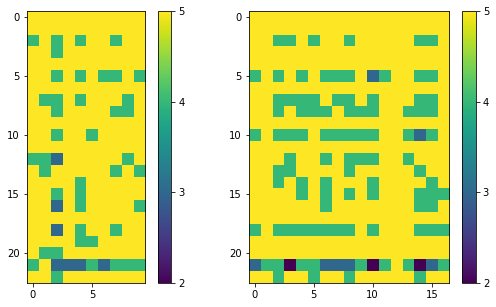

In [7]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

import matplotlib.pyplot as plt
plt.figure(0, figsize = [10, 5])
plt.subplot(121)
plt.imshow(first_year, vmin=2, vmax=5)
plt.colorbar(ticks=[2, 3, 4, 5])
plt.subplot(122)
plt.imshow(second_year, vmin=2, vmax=5)
plt.colorbar(ticks=[2, 3, 4, 5])

a probe of the neural network

In [8]:
pip install neurolab

     |████████████████████████████████| 645 kB 5.0 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=3ce34296303bc1c99bfe0a73b8f5ae6394b56fa689932e7f8652dc77ea2aa138
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


# Single layer

Epoch: 10; Error: 29.0;
Epoch: 20; Error: 36.5;
Epoch: 30; Error: 29.5;
Epoch: 40; Error: 33.5;
Epoch: 50; Error: 29.0;
Epoch: 60; Error: 27.0;
Epoch: 70; Error: 29.0;
Epoch: 80; Error: 27.0;
Epoch: 90; Error: 27.5;
Epoch: 100; Error: 28.0;
The maximum number of train epochs is reached


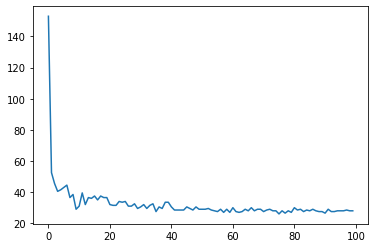

In [9]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year[:, :]-shift

#inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
#tar = [[1, 1], [1, 0], [0, 1], [0, 0]]

import neurolab as nl
full_data = np.hstack((inp, tar))
minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
neurons = np.size(tar, 1)

# single layer
net = nl.net.newp(minmax, neurons)
error = net.train(inp, tar, epochs=100, show=10, lr=0.1)


import matplotlib.pyplot as plt

plt.plot(error)

test example

In [10]:
#net.sim([[0, 0]])

Test my data

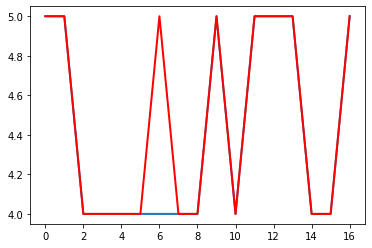

In [11]:
s = 7 #student number
x = first_year[s,:]-shift
net_output = np.round(net.sim([x.tolist()]))
real_output = tar[s, :]

plt.plot(net_output.squeeze()+shift, linewidth = 2)
plt.plot(real_output+shift, linewidth = 2, color = 'red')

# Multilayer

In [12]:
# my data
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year[:, :]-shift

# example data
#inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
#tar = [[1, 1], [1, 0], [0, 1], [0, 0]]

full_data = np.hstack((inp, tar))
minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
neurons = np.size(tar, 1)

net = nl.net.newff(minmax,[10,neurons])
error = net.train(inp, tar, epochs=100, show=10, goal=0.02)

Epoch: 10; Error: 39.34673306366827;
Epoch: 20; Error: 25.98605480098956;
Epoch: 30; Error: 17.87964525242927;
Epoch: 40; Error: 12.56751039712341;
Epoch: 50; Error: 10.068864888604912;
Epoch: 60; Error: 8.447027791576012;
Epoch: 70; Error: 7.960895057578149;
Epoch: 80; Error: 7.6355352593048265;
Epoch: 90; Error: 7.111839113984405;
Epoch: 100; Error: 6.62323644680284;
The maximum number of train epochs is reached


test example

In [13]:
#np.round(net.sim([[1, 0]]))

test my data

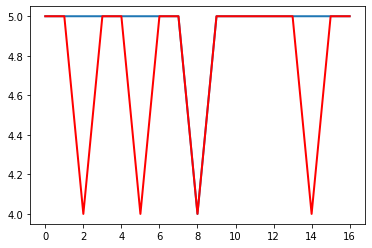

In [14]:
s = 22
 #student number
x = first_year[s,:]-shift
net_output = np.round(net.sim([x.tolist()]))
real_output = tar[s, :]


plt.plot(net_output.squeeze()+shift, linewidth = 2)
plt.plot(real_output+shift, linewidth = 2, color = 'red')

# Multi-layer perceptron + regression coefficients

In [15]:
def regressGrades(first_year, second_year):
  noise = np.random.rand(1)*0.1
  ouput_size = np.size(second_year, 1)
  input_size = np.size(first_year, 1)
  R2 = [];
  for j in range(ouput_size): # output index 
    R1 = [];  
    for i in range(input_size):  # input index
      r = np.corrcoef(first_year[:, i], second_year[:, j]+noise)      
      R1.append(r[0, 1])
    R2.append(R1);
  return np.array(R2)

def predictGrades(grades_in, R2):
  from numpy.linalg import norm
  ouput_size = np.size(R2, 0)
  G = [];
  for j in range(ouput_size):
    R = R2[j]
    R[R<0] = 0# avoid negative correlation
    grade_out = norm(R*grades_in)/norm(R)
    G.append(grade_out)
  return np.array(G)

def miniNet(inp, tar):
  full_data = np.hstack((inp, tar))
  minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
  neurons = np.size(tar, 1)

  net = nl.net.newff(minmax,[10,neurons])
  error = net.train(inp, tar, epochs=100, show=10, goal=0.02)
  return net

In [16]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year-shift

# regression coefficients
R2 = regressGrades(first_year, second_year)

# Multi-layer perceptron
net = miniNet(inp, tar)

Epoch: 10; Error: 41.425038045550295;
Epoch: 20; Error: 36.84367124172156;
Epoch: 30; Error: 21.323846806233586;
Epoch: 40; Error: 15.018484203353857;
Epoch: 50; Error: 10.75015621206093;
Epoch: 60; Error: 7.4255954243791225;
Epoch: 70; Error: 5.927767422847072;
Epoch: 80; Error: 4.888550732804374;
Epoch: 90; Error: 4.110985539330988;
Epoch: 100; Error: 3.741082436826845;
The maximum number of train epochs is reached


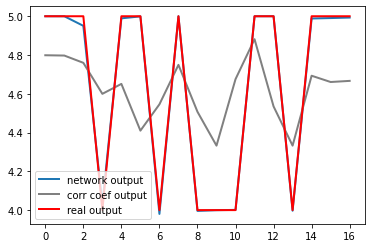

In [17]:
s = 12 #student number

grades_in = first_year[s]

x = grades_in-shift
net_output = net.sim([x.tolist()])
cor_output = predictGrades(grades_in, R2)

real_output = tar[s, :]

plt.plot(net_output.squeeze()+shift, linewidth = 2, label = 'network output')
plt.plot(cor_output, linewidth = 2, color = 'gray', label = 'corr coef output')
plt.plot(real_output+shift, linewidth = 2, color = 'red', label = 'real output')
plt.legend()

# Learning Function
get learning coefficients from a dataset

In [18]:
import io
import pickle

def learnFromFile(filepath):
  df = pd.read_excel(filepath, skiprows = 0)
  df.columns = df.columns.astype(str)# make all columns as str

  # get years
  columns = df.columns.to_numpy().astype(str)
  years = np.unique([int(columns[i][0:4]) for i in range(1, np.size(columns))])
  print('learning...')
  N = []
  R = []
  previous_grades = []
  for i in range(np.size(years)-1):
    current_year = years[i]
    next_year = years[i+1]
    current_year_grades ,_ = getYear(df, current_year)
    next_year_grades ,_ = getYear(df, next_year)
    if i >0:
      previous_grades = np.concatenate((previous_grades, current_year_grades), 1)
    else:
      previous_grades = current_year_grades.copy()
    # regression coefficients
    r = regressGrades(previous_grades, next_year_grades)
    nan_cond = np.where(np.isnan(r))
    r[nan_cond] = 0
    print(np.shape(previous_grades), np.shape(current_year_grades))
    # Multi-layer perceptron
    shift = 4
    inp = previous_grades-shift
    tar = next_year_grades-shift
    net = miniNet(inp, tar)
    #print(current_year_grades, next_year_grades, r, current_year)
    R.append(r)
    N.append(net)
  return R, N

filepath = '/content/StudentNeuralNetwork/example_dataset_v2.xlsx'
R, N = learnFromFile(filepath)
pickle.dump( R, open( "/content/StudentNeuralNetwork/R.p", "wb" ) )
pickle.dump( N, open( "/content/StudentNeuralNetwork/N.p", "wb" ) )
#print(np.shape(np.asarray(R)), np.shape(np.array(prediction_rates)))
#print(R, 'R')
#print('-----')
#print(prediction_rates)

learning...
(23, 10) (23, 10)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Epoch: 10; Error: 111.2306476990521;
Epoch: 20; Error: 52.76101692588761;
Epoch: 30; Error: 46.858998883030694;
Epoch: 40; Error: 42.65494763792288;
Epoch: 50; Error: 39.93365588662658;
Epoch: 60; Error: 37.89682325067943;
Epoch: 70; Error: 36.50458992516519;
Epoch: 80; Error: 35.04484376767546;
Epoch: 90; Error: 34.37116758483594;
Epoch: 100; Error: 33.98956137694964;
The maximum number of train epochs is reached
(23, 27) (23, 17)
Epoch: 10; Error: 181.4580265342598;
Epoch: 20; Error: 120.05632612478384;
Epoch: 30; Error: 100.31294751820508;
Epoch: 40; Error: 93.42963138077089;
Epoch: 50; Error: 85.13574520211361;
Epoch: 60; Error: 45.302682835194986;
Epoch: 70; Error: 38.83937623990134;
Epoch: 80; Error: 35.59978937198615;
Epoch: 90; Error: 30.177347374870575;
Epoch: 100; Error: 27.14206185217912;
The maximum number of train epochs is reached
(23, 68) (23, 41)
Epoch: 10; Error: 7.379727733183317;
Epoch: 20; Error: 5.5779477713900665;
Epoch: 30; Error: 3.8314834537459355;
Epoch: 40; E

# Prediction Function 
predict trajectory using file with grades

In [19]:
def predictByFile(filepath, prediction_rates, neural_networks):
  st_df = pd.read_excel(filepath, skiprows = 0)# read student's data
  st_df.drop(st_df.columns[[0]], axis=1, inplace=True)
  #print(st_df)
  st_df.columns = st_df.columns.astype(str)# make all columns as str

  # get years
  columns = st_df.columns.to_numpy().astype(str)
  years = np.unique([int(columns[i][0:4]) for i in range(np.size(columns))])
  print(years)
  years = np.delete(years, -1) # we don't need the last year
 

  overal_grades = [];
  overal_columns = [];
  for i in range(np.size(years)):
    year = years[i]
    R = prediction_rates[i]# current 'regression coefficients'
    net = neural_networks[i]# current neural network

    # get grades  
    spike_cols = [col for col in st_df.columns if str(year) in col]
    #print(spike_cols)
    #print(st_df[spike_cols].to_numpy()[0], year)
    data_out = st_df[spike_cols].to_numpy()[0, :].astype(float)    
    current_year_grades = data_out.copy()

    # names of the subject
    #columns = st_df[spike_cols].to_numpy()[0].astype(str)
    #overal_columns = np.concatenate((overal_columns, columns), 0)
    
    if i > 0:
      # remove nan values by previously predicted grades
      nan_cond = np.where(np.isnan(current_year_grades))
      current_year_grades[nan_cond] = predicted_grades[nan_cond]  
      
    # concatenate all grades for the next prediction
    overal_grades = np.concatenate((overal_grades, current_year_grades))

    # predict the next year
    predicted_grades = predictGrades(overal_grades, R) 
    #print(predicted_grades, ' - predicted') 
    shift = 4
    x = overal_grades-shift
    net_output = (net.sim([x.tolist()])+shift).squeeze()
    
    final_grades = np.concatenate((overal_grades, net_output))
    final_columns = st_df.to_numpy()[0].astype(str)
  #print(overal_columns, final_grades)

  st_df.loc['predicted'] = final_grades
  
  return st_df#final_grades, final_columns

R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
N = pickle.load( open( "/content/StudentNeuralNetwork/N.p", "rb" ) )
filepath = '/content/StudentNeuralNetwork/student_data_in_v2.xlsx'
st_df = predictByFile(filepath, R, N)
st_df

[2018 2019 2020 2021]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


,"2018,Физика","2018,Химия","2018,Высшая математика","2018,Иностранный язык","2018,Информационные и компьютерные технологии","2018,Инженерное геометрическое моделирование","2018,Технологии самообразования и самоорганизации","2018,Русский язык и культура речи","2018,История","2018,Правоведение","2019,Безопасность жизнедеятельности","2019,Экология","2019,Материаловедение","2019,Теоретическая механика","2019,Специальные разделы математики","2019,Теоретические основы теплотехники 1","2019,Теоретические основы электротехники 1","2019,Теоретические основы электротехники 2","2019,Методы моделирования и исследования","2019,Философия","2019,Электрические цепи и электротехнические устройства","2019,Тепловая и ядерная энергетика","2019,Электробезопасность и охрана труда","2019,Менеджмент","2019,Энергетические машины, аппараты и установки","2019,Метрология, стандартизация и сертификация","2019,Экономика","2020,Безопасность жизнедеятельности","2020,Высшая математика","2020,Инженерное геометрическое моделирование","2020,Иностранный язык","2020,Информационные и компьютерные технологии","2020,История","2020,Материаловедение","2020,Менеджмент","2020,Методы моделирования и исследования","2020,Метрология, стандартизация и сертификация","2020,Правоведение","2020,Русский язык и культура речи","2020,Специальные разделы математики","2020,Теоретическая механика","2020,Теоретические основы теплотехники 1","2020,Теоретические основы электротехники 1","2020,Теоретические основы электротехники 2","2020,Тепловая и ядерная энергетика","2020,Технологии самообразования и самоорганизации","2020,Физика","2020,Философия","2020,Химия","2020,Экология","2020,Экономика","2020,Электрические цепи и электротехнические устройства","2020,Электробезопасность и охрана труда","2020,Энергетические машины, аппараты и установки","2020,Электрические машины","2020,Электроэнергетические системы и сети","2020,Электромонтажное дело","2020,Основы релейной защиты","2020,Нормативно-техническая и эксплуатационная документация по релейной защите","2020,История (История России, Всеобщая история)","2020,Теоретические основы электротехники","2020,Прикладная механика","2020,Промышленная электроника","2020,Физическая культура и спорт","2020,Элементы автоматических устройств","2020,Техника высоких напряжений","2020,Электроснабжение","2020,Электромонтажные работы в действующих электроустановках до 1000 В","2021,Автоматизация электроэнергетических систем","2021,Переходные электромеханические процессы","2021,Основы проектирования релейной защиты и автоматики","2021,Расчет токов короткого замыкания","2021,Релейная защита электроэнергетических систем","2021,Релейная зашита объектов электроэнергетических систем","2021,Микропроцессорные системы управления в электроэнергетике","2021,Технические средства диспетчерского и технологического управления"
0,4.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
predicted,4.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.301096,3.299249,3.28647,3.711819,3.253075,3.360598,3.35896,3.28329,3.265054,3.414946,3.549331,3.256411,3.277783,3.322774,3.711819,3.711819,3.711819,3.26208,3.28329,4.999979,3.000338,3.0,4.69701,3.021577,3.008643,3.523306,5.0


In [20]:
np.size(st_df, 1)

76

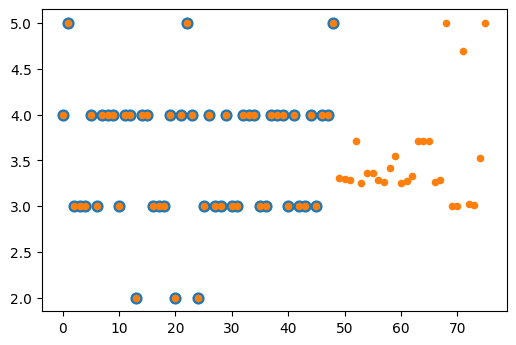

In [21]:
import matplotlib.pyplot as plt
subjects = list(range(np.size(st_df, 1)))
plt.figure(0, dpi = 100)
plt.scatter(subjects, st_df.loc[0], 60)
plt.scatter(subjects, st_df.loc['predicted'], 20)

In [22]:
!pip install anvil-uplink

     |████████████████████████████████| 62 kB 639 kB/s 
     |████████████████████████████████| 51 kB 157 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=2ac5633bf3d5c28699c778750dbe6f62cf66aac863140039f0c750a423269ee3
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [23]:
import os
import anvil.server

def excel_to_blobmedia(filepath):
    df = pd.read_excel(filepath, skiprows = 0)# read student's data
    content = io.BytesIO()
    df.to_excel(content, index=False)
    content.seek(0, 0)

    head, tail = os.path.split(filepath)

    return anvil.BlobMedia(content=content.read(), content_type="application/vnd.ms-excel", name=tail)

R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
N = pickle.load( open( "/content/StudentNeuralNetwork/N.p", "rb" ) )
filepath = '/content/StudentNeuralNetwork/student_data_in_v2.xlsx'
df_in = predictByFile(filepath, R, N)

filepath = '/content/StudentNeuralNetwork/student_data_out.xlsx'
df_in.to_excel(filepath, index=False)

excel_to_blobmedia(filepath)

[2018 2019 2020 2021]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


BlobMedia[application/vnd.ms-excel,7387 bytes,name=student_data_out.xlsx]

In [ ]:
import anvil.server
import pickle

@anvil.server.callable
# https://anvil.works/forum/t/upload-file-to-uplink-local-storage-using-file-loader/3693
def saveTable(file):
  with open('/content/StudentNeuralNetwork/student_data_in_v2.xlsx', 'wb') as f:
    f.write(file.get_bytes())

@anvil.server.callable
def saveDataset(file):
  filepath = '/content/StudentNeuralNetwork/dataset.xlsx'
  with open(filepath, 'wb') as f:
    f.write(file.get_bytes())
  R, N = learnFromFile(filepath)
  pickle.dump( R, open( "/content/StudentNeuralNetwork/R.p", "wb" ) )
  pickle.dump( N, open( "/content/StudentNeuralNetwork/N.p", "wb" ) )
  return 'Dataset is loaded'

@anvil.server.callable
def callThePrediction():
  R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
  N = pickle.load( open( "/content/StudentNeuralNetwork/N.p", "rb" ) )
  df = predictByFile('/content/StudentNeuralNetwork/student_data_in_v2.xlsx', R, N)
  df.to_excel('/content/StudentNeuralNetwork/student_data_out.xlsx', index=False)
  # https://anvil.works/forum/t/download-excel-file/7464/4
  media_out = excel_to_blobmedia(filepath)
  return media_out

anvil.server.connect('RMSJ4GHU4YIGH3T5VHOWSHL2-OHI7U7ZW5FYT3CYA')
anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
